**Понимание работы нейронных сетей**


Нейронные сети получили такое название, потому что их внутренняя структура должна имитировать человеческий мозг. Последний состоит из нейронов и синапсов, которые их соединяют. В момент стимуляции нейроны «активируют» другие с помощью электричества.

Каждый нейрон «активируется» в первую очередь за счет вычисления взвешенной суммы вводных данных и последующего результата с помощью результирующей функции. Когда нейрон активируется, он в свою очередь активирует остальные, которые выполняют похожие вычисления, вызывая цепную реакцию между всеми нейронами всех слоев.

Стоит отметить, что пусть нейронные сети и вдохновлены биологическими, сравнивать их все-таки нельзя.

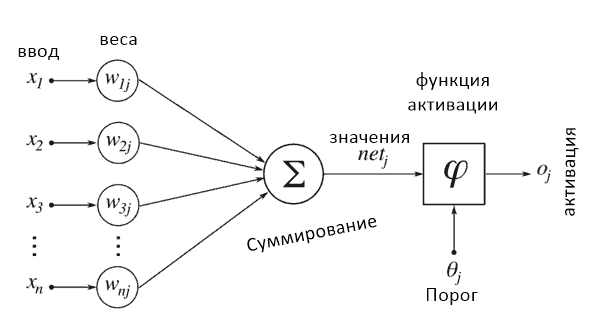

*  Эта диаграмма иллюстрирует процесс активации, через который проходит каждый нейрон. Рассмотрим схему слева направо.
*  Все вводные данные (числовые значения) из входящих нейронов считываются. Они определяются как x1…xn.
*  Каждый ввод умножается на взвешенную сумму, ассоциированную с этим соединением. Ассоциированные веса обозначены как W1j…Wnj.
*  Все взвешенные вводы суммируются и передаются активирующей функции. Она читает этот ввод и трансформирует его в числовое значение k-ближайших соседей.
*  В итоге числовое значение, которое возвращает эта функция, будет вводом для другого нейрона в другом слое.

**Слои нейронной сети**


Нейроны внутри нейронной сети организованы в слои. Слои — это способ создать структуру, где каждый содержит 1 или большее количество нейронов. В нейронной сети обычно 3 или больше слоев. Также всегда определяются 2 специальных слоя, которые выполняют роль ввода и вывода.

* Слой ввода является точкой входа в нейронную сеть. В рамках программировании его можно воспринимать как аргумент функции.
* Вывод — это результат работы нейронной сети. В терминах программирования это возвращаемое функцией значение.
Слои между ними описываются как «скрытые слои». Именно там происходят все вычисления. Все слои в нейронной сети кодируются как признаковые описания.

**Выбор количества скрытых слоев и нейронов**


Нет золотого правила, которым стоит руководствоваться при выборе количества слоев и их размера (или числа нейронов). Как правило, стоит попробовать как минимум 1 такой слой и дальше настраивать размер, проверяя, что работает лучше всего.

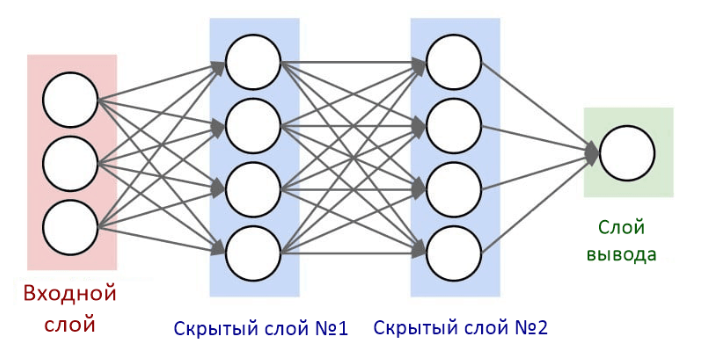

Такие библиотеки, как Tensorflow, Torch, Theano и Keras уже определили основные структуры данных для нейронной сети, оставив необходимость лишь декларативно описать структуру нейронной сети.

Keras предоставляет еще и определенную свободу: возможность выбрать количество слоев, число нейронов, тип слоя и функцию активации. На практике элементов довольно много, но в этот раз обойдемся более простыми примерами.

Как уже упоминалось, есть два специальных уровня, которые должны быть определены на основе конкретной проблемы: размер слоя ввода и размер слоя вывода. Все остальные «скрытые слои» используются для изучения сложных нелинейных абстракций задачи.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical, plot_model

**База данных MNIST**

MNIST — это огромная база данных рукописных цифр, которая используется как бенчмарк и точка знакомства с машинным обучением и системами обработки изображений. Она идеально подходит, чтобы сосредоточиться именно на процессе обучения нейронной сети.
**Цель**

Натренировать систему, классифицировать каждое соответствующим ярлыком (изображенной цифрой). С помощью набора данных из 60 000 изображений рукописных цифр (представленных в виде изображений 28х28 пикселей, каждый из которых является градацией серого от 0 до 255).


**Набор данных**

Набор данных состоит из тренировочных и тестовых данных, но для упрощения здесь будет использоваться только тренировочный.

In [ ]:
mnist=keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 ... 5 6 8]


In [ ]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
xtrain[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  62,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 120, 180,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 126, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   2, 153, 210,  40,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 220, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,  27, 254, 162,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 222, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 183, 254, 125,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  46, 245, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 198, 254,  56,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 120, 254, 163,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  23, 231, 254,  29,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254, 120,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 163, 254, 216,  16,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  67,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  14,  86, 178, 248, 254,  91,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 159, 254,  85,   0,   0,   0,  47,  49, 116, 144,
        150, 241, 243, 234, 179, 241, 252,  40,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0, 150, 253, 237, 207, 207, 207, 253, 254, 250, 240,
        198, 143,  91,  28,   5, 233, 250,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 119, 177, 177, 177, 177, 177,  98,  56,   0,
          0,   0,   0,   0, 102, 254, 220,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 137,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  57,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254,  96,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 254, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 169, 255, 153,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
ytrain[4]

9

In [ ]:
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [ ]:
class_names

['Zero',
 'One',
 'Two',
 'Three',
 'Four',
 'Five',
 'Six',
 'Seven',
 'Eight',
 'Nine']

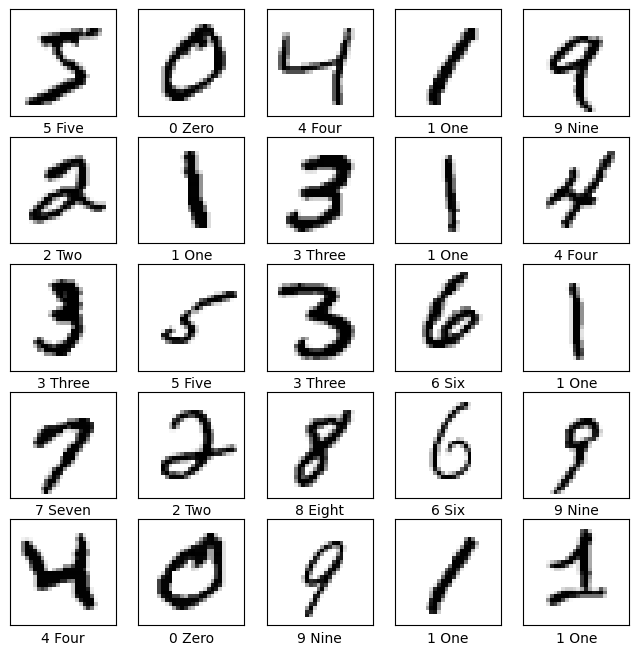

In [ ]:
plt.figure(figsize = (8, 8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xtrain[i], cmap = plt.cm.binary)
    plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]]))
plt.show()

In [ ]:
xtrain = xtrain/255

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest = xtest/255

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
ytrain[0]

5

In [ ]:
from keras.utils import to_categorical

In [ ]:
ytrain = to_categorical(ytrain)

In [ ]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
ytrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
ytest = to_categorical(ytest)

In [ ]:
ytrain.shape

(60000, 10)

In [ ]:
ytest.shape

(10000, 10)

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
# Извлечение фич
model.add(layers.Conv2D(6, (3, 3), input_shape = (28,28,1), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(10, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten(input_shape=(28, 28)))
# Классификатор
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
# Выходной слой
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 10)          │             550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 10)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 250)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 80)                  │           8,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 54,528 (213.00 KB)

 Trainable params: 54,528 (213.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True
True


In [ ]:
xtrain_reshape = xtrain.reshape(60000, 28, 28, 1)
xtest_reshape = xtest.reshape(10000, 28, 28, 1)

In [ ]:
model.fit(xtrain_reshape, ytrain,
          epochs=100,
          batch_size=1000,
          verbose=True,
          validation_data = (xtest_reshape, ytest))

Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9178 - loss: 0.2751 - val_accuracy: 0.9500 - val_loss: 0.1656
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9470 - loss: 0.1716 - val_accuracy: 0.9639 - val_loss: 0.1253
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9604 - loss: 0.1282 - val_accuracy: 0.9718 - val_loss: 0.0952
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9687 - loss: 0.1028 - val_accuracy: 0.9746 - val_loss: 0.0801
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9708 - loss: 0.0932 - val_accuracy: 0.9789 - val_loss: 0.0674
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9753 - loss: 0.0788 - val_accuracy: 0.9809 - val_loss: 0.0635
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9777 - loss: 0.0709 - val_accuracy: 0.9823 - val_loss: 0.0569
Epoch 8/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9808 - loss: 0.0615 - val_accuracy: 0.9822 - 

In [ ]:
test_loss, test_acc = model.evaluate(xtest_reshape, ytest)
print("accuracy", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9876 - loss: 0.0661
accuracy 0.9902999997138977


In [ ]:
predictions = model.predict(xtest_reshape)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
def plot_image(i, prediction_array, true_label, img):
    prediction_array, true_label, img = prediction_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(prediction_array)
    true_label = np.argmax(true_label)

    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(prediction_array),
                                         class_names[true_label],
                                         ), color=color)

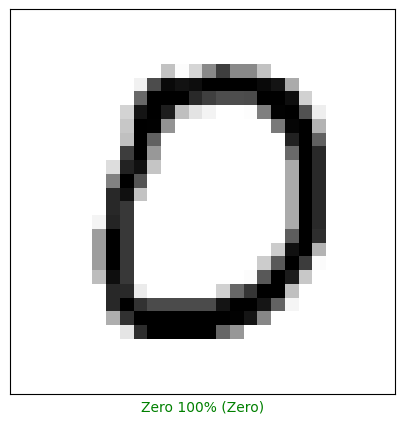

In [ ]:
plt.figure(figsize = (5, 5))
plot_image(10, predictions, ytest, xtest)
plt.show()

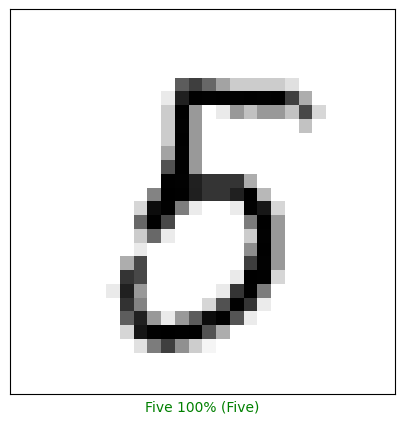

In [ ]:
plt.figure(figsize = (5, 5))
plot_image(45, predictions, ytest, xtest)
plt.show()

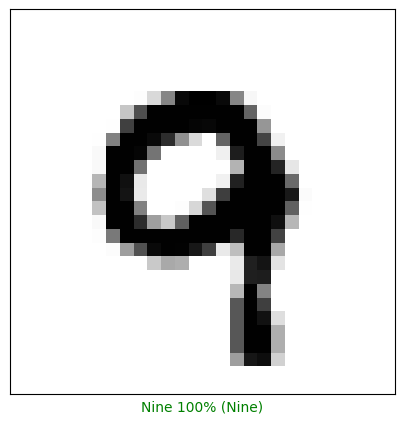

In [ ]:
plt.figure(figsize = (5, 5))
plot_image(99, predictions, ytest, xtest)
plt.show()

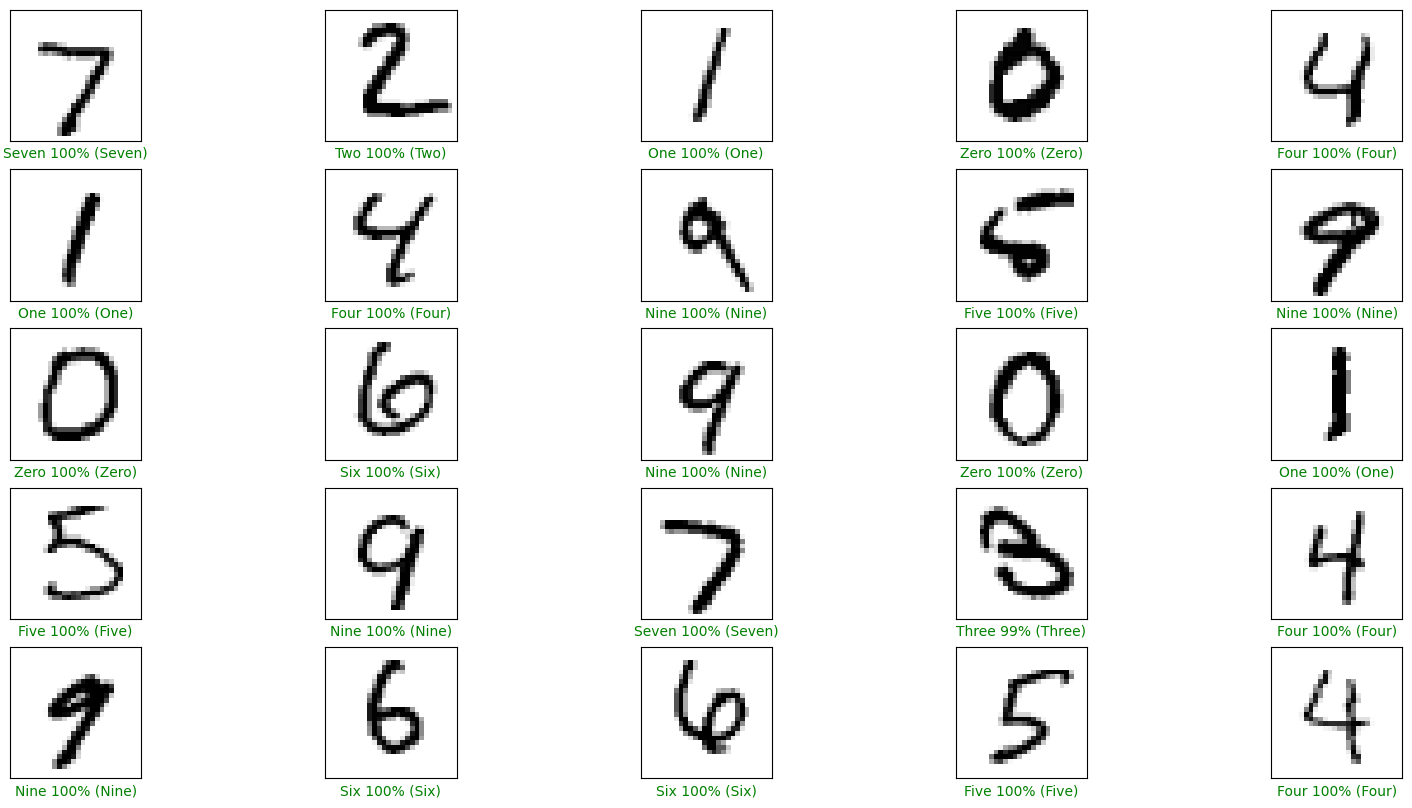

In [ ]:
num_rows = 5
num_cols = 5
num_images = num_rows* num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_image(i, predictions, ytest, xtest)
plt.show()

In [ ]:
import numpy as np
import cv2

def resize_to_28x28(img):
    img_h, img_w = img.shape
    dim_size_max = max(img.shape)

    if dim_size_max == img_w:
        im_h = (26 * img_h) // img_w
        if im_h <= 0 or img_w <= 0:
            print("Invalid Image Dimention: ", im_h, img_w, img_h)
        tmp_img = cv2.resize(img, (26,im_h),0,0,cv2.INTER_NEAREST)
    else:
        im_w = (26 * img_w) // img_h
        if im_w <= 0 or img_h <= 0:
            print("Invalid Image Dimention: ", im_w, img_w, img_h)
        tmp_img = cv2.resize(img, (im_w, 26),0,0,cv2.INTER_NEAREST)

    out_img = np.zeros((28, 28), dtype=np.ubyte)

    nb_h, nb_w = out_img.shape
    na_h, na_w = tmp_img.shape
    y_min = (nb_w) // 2 - (na_w // 2)
    y_max = y_min + na_w
    x_min = (nb_h) // 2 - (na_h // 2)
    x_max = x_min + na_h

    out_img[x_min:x_max, y_min:y_max] = tmp_img

    return out_img

def run_inference(img):
    tsr_img = resize_to_28x28(img)
    input_data = np.copy(tsr_img).reshape(1,28,28,1)
    return input_data

    # if floating_model:
    #     input_data = (np.float32(input_data) - input_mean) / input_std



---



---



In [ ]:
img = cv2.imread('/content/one.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
img.shape

(28, 28)

In [ ]:
for i in range(28):
    for j in range(28):
        if img[i,j]==255:
            img[i,j]=0
        else:
            img[i,j]=255

In [ ]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0,   0, 255, 255,   0, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,
        255, 255, 255, 255,   0,   0, 255, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
new_image = run_inference(img)

In [ ]:
new_image.shape

(1, 28, 28, 1)

In [ ]:
predict_1 = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [ ]:
predict_1

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

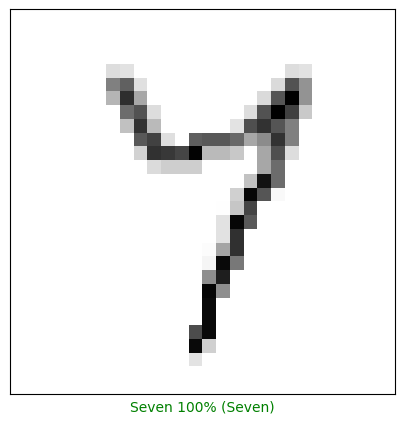

In [ ]:
plt.figure(figsize = (5, 5))
plot_image(0, predict_1, predict_1, new_image)
plt.show()



---



---



In [ ]:
img = cv2.imread('/content/five.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
img.shape

(28, 28)

In [ ]:
for i in range(28):
    for j in range(28):
        if img[i,j]==255:
            img[i,j]=0
        else:
            img[i,j]=255

In [ ]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
          0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
new_image = run_inference(img)

In [ ]:
new_image.shape

(1, 28, 28, 1)

In [ ]:
predict_1 = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
predict_1

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

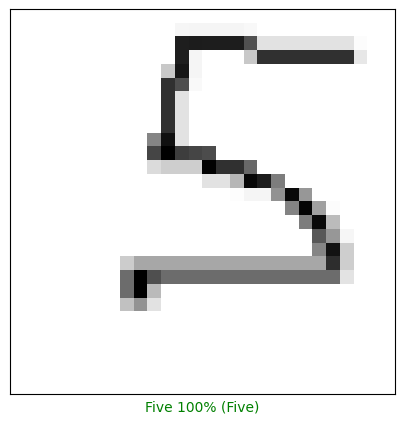

In [ ]:
plt.figure(figsize = (5, 5))
plot_image(0, predict_1, predict_1, new_image)
plt.show()



---



---



In [ ]:
img = cv2.imread('/content/one.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
img.shape

(28, 28)

In [ ]:
for i in range(28):
    for j in range(28):
        if img[i,j]==255:
            img[i,j]=0
        else:
            img[i,j]=255

In [ ]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255,   0, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
          0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,
          0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,
          0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
          0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
new_image = run_inference(img)

In [ ]:
new_image.shape

(1, 28, 28, 1)

In [ ]:
predict_1 = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
predict_1

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

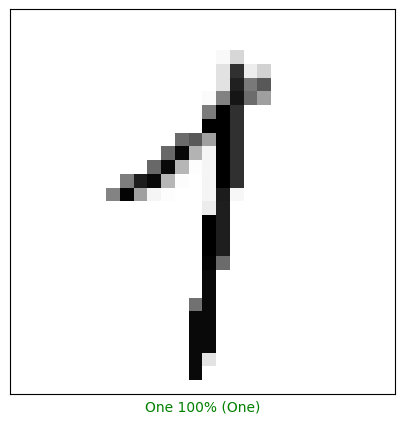

In [ ]:
plt.figure(figsize = (5, 5))
plot_image(0, predict_1, predict_1, new_image)
plt.show()



---



In [ ]:
img = cv2.imread('/content/face.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
img.shape

(28, 28)

In [ ]:
for i in range(28):
    for j in range(28):
        if img[i,j]==255:
            img[i,j]=0
        else:
            img[i,j]=255

In [ ]:
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
          0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,
          0,   0],
       [  0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,   0,
          0,   0],
       [  0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,   0,
          0,   0],
       [  0,   0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255,
          0,   0],
       [  0,   0, 255,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255,
          0,   0],
       [  0, 255, 255,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0, 255,
        255,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,
        255,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,
        255,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255],
       [  0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255],
       [  0, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255],
       [  0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255],
       [  0,   0, 255, 255,   0,   0,   0,   0, 255, 255, 255, 255,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,
        255, 255],
       [  0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0, 255, 255,
          0,   0,   0,   0,   0, 255, 255, 255,   0,   0,   0,   0,   0,
        255,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,   0,
        255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
        255,   0],
       [  0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,   0,
        255,   0],
       [  0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        255,   0],
       [  0,   0,   0,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255,
        255,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
new_image = run_inference(img)

In [ ]:
new_image.shape

(1, 28, 28, 1)

In [ ]:
predict_1 = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
predict_1

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

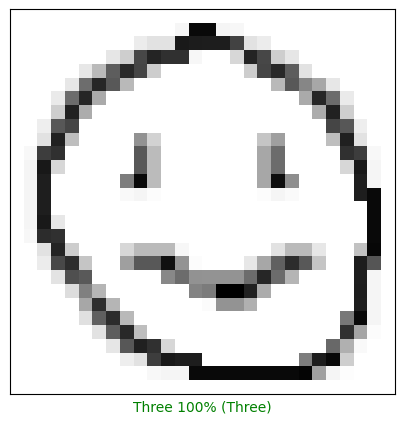

In [ ]:
plt.figure(figsize = (5, 5))
plot_image(0, predict_1, predict_1, new_image)
plt.show()